In [1]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

"""
def best_fit_distribution(data, bins=200, ax=None):
#    Model data by finding best fit distribution to data
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    DISTRIBUTIONS =[st.gamma]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
#    Generate distributions's Probability Distribution Function

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = []
for i in open("psite_islands/olsen2006_S2_permuts.txt"):
    data.append(np.log10(eval(i) + 1))
data = np.array(data)
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=10, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=10, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Null model S2 best fit distribution \n' + dist_str)
ax.set_xlabel(u'log10(S2 + 1)')
ax.set_ylabel('PDF')
"""

'\ndef best_fit_distribution(data, bins=200, ax=None):\n#    Model data by finding best fit distribution to data\n    # Get histogram of original data\n    y, x = np.histogram(data, bins=bins, density=True)\n    x = (x + np.roll(x, -1))[:-1] / 2.0\n\n    # Distributions to check\n    DISTRIBUTIONS = [        \n        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,\n        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,\n        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,\n        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,\n        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,\n        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable

In [2]:
#https://stackoverflow.com/questions/35990467/fit-two-gaussians-to-a-histogram-from-one-set-of-data-python
import scipy as sp
from pylab import *
from scipy.optimize import curve_fit

def gamma_f(x, k, theta, A):
    return A*(1/(theta**k))*(x**(k - 1))*np.exp(-x/theta)/sp.special.gamma(k)

def bimodal(x, k1, theta1, A1, k2, theta2, A2):
    return gamma_f(x, k1, theta1, A1) + gamma_f(x, k2, theta2, A2)

def bimodal_construct(k1, theta1, A1):
    def bimodal(x, k2, theta2, A2, A1):
        return gamma_f(x, k1, theta1, A1) + gamma_f(x, k2, theta2, A2)
    return bimodal

#"psite_islands/olsen2006_S2_permuts.txt"
#"psite_islands/olsen2006_S2_stats.txt"
def gamma_dists(permut_filename, data_filename):
    data0 = []
    minval = 1
    maxval = 0
    for i in open(permut_filename):
        if eval(i) > 1000:
            continue
        val = np.log10(eval(i) + 1)
        data0.append(val)
    data0 = np.array(data0)
    
    with PdfPages("dists" + '.pdf') as pdf:
        y0,x0,_=hist(data0,20,alpha=.3,label='data')
    
        x0=(x0[1:]+x0[:-1])/2 # for len(x)==len(y)
    
        expected0 = (1,1,1)
        params0,cov=curve_fit(gamma_f,x0,y0,expected0)
    
        data1 = []
        for i in open(data_filename):
            if eval(i) > 1000:
                continue
            val = np.log10(eval(i) + 1)
            data1.append(val)
            if val > maxval:
                maxval = val
            if val < minval:
                minval = val
        data1 = np.array(data1)
        
        y1,x1,_=hist(data1,20,alpha=.3,label='data')
        
        x1=(x1[1:]+x1[:-1])/2 # for len(x)==len(y)
        bimodal_func = bimodal_construct(*params0)
        
        expected1 = (1,1,1,1)
        params1,cov=curve_fit(bimodal_func,x1,y1,expected1)
        
        sigma=sqrt(diag(cov))
        xmax = max(x0)
        x_step = 0.01
        xran = [0]
        for i in range(int(xmax/x_step + 1)):
            xran.append(xran[-1] + 0.01)
        xran = np.array(xran)
        plot(xran,gamma_f(xran,*params0),color='red',lw=3,label='model')
        
        params0_dist = np.append(params0[:-1], params1[-1])
        params1_dist = params1[:-1]
#FITTED CURVES
        plot(xran,gamma_f(xran,*params0_dist),color='blue',lw=3,label='model')
        plot(xran,gamma_f(xran,*params1_dist),color='blue',lw=3,label='model')
        pdf.savefig()
        params_dict = {"0dist":{'A':params0_dist[2], 'k':params0_dist[0], "theta":params0_dist[1]}, "real_dist":{'A':params1_dist[2], 'k':params1_dist[0], "theta":params1_dist[1]}}
    return params_dict, minval, maxval 

#gamma_dists("psite_islands/olsen2006_S2_permuts.txt", "psite_islands/olsen2006_S2_stats.txt")

In [3]:
def make_disord_reg_dict1(disord_reg_filename):
    disord_reg_dict = dict()
    with open(disord_reg_filename) as disord_regs:
        for protein_rec in disord_regs:
            protein_rec = protein_rec.strip().split()
            try:
                a = protein_rec[1]
            except:
#                print(protein_rec)
                continue
            disord_reg_dict[protein_rec[0]] = []
            for disord_reg in protein_rec[1].split('|'):
                reg = disord_reg.split('-')
                reg = [eval(reg[0]) - 1, eval(reg[1])]
                disord_reg_dict[protein_rec[0]].append(reg)
    return disord_reg_dict

def make_psite_dict(psite_filename):
    psite_dict = dict()
    with open(psite_filename) as psites:
        for psite_rec in psites:
            psite_rec = psite_rec.strip().split()
            if psite_dict.get(psite_rec[0]):
                psite_dict[psite_rec[0]].append(eval(psite_rec[2]) - 1)
            else:
                psite_dict[psite_rec[0]] = [eval(psite_rec[2]) - 1]
    for k in psite_dict.keys():
        psite_dict[k].sort()
    return psite_dict

def make_disord_reg_site_dict(disord_reg_dict, psite_dict):
    disord_reg_site_dict = dict()
    for gene_id in disord_reg_dict.keys():
        disord_reg_site_dict[gene_id] = dict()
        for disord_reg in disord_reg_dict[gene_id]:
            if not psite_dict.get(gene_id):
                continue
            sites_in_reg = [i for i in psite_dict[gene_id] if (i < disord_reg[1] and i >= disord_reg[0])]
            disord_reg_site_dict[gene_id][(disord_reg[0], disord_reg[1])] = sorted(sites_in_reg)
    return disord_reg_site_dict

In [4]:
#Next, we want to infer transitional probabilities a_IN and a_NI for
#changing the state of the model from Island to Non-island and vice-versa
#
#We want to achieve this by grid-search of a_IN and a_NI that minimize
#differences between the "real" distribution of distances between residues
#in phospho islands and the obtained with our model

class Fit_model():
    def __init__(self, gammadist_param_dict, a_IN, a_NI, p_bI, p_bN):
        self.A0 = gammadist_param_dict["0dist"]['A']
        self.k0 = gammadist_param_dict["0dist"]['k']
        self.theta0 = gammadist_param_dict["0dist"]['theta']
        self.A1 = gammadist_param_dict["real_dist"]['A']
        self.k1 = gammadist_param_dict["real_dist"]['k']
        self.theta1 = gammadist_param_dict["real_dist"]['theta']
        self.a_IN = a_IN
        self.a_NI = a_NI
        self.p_bI = p_bI
        self.p_bN = p_bN

def run_viterbi(inp_list, fit_model):
    probs = [[np.log10(fit_model.p_bI)],[np.log10(fit_model.p_bN)]]
    paths = [['b'],['b']]
    p_II = np.log10(1 - fit_model.a_IN)
    p_IN = np.log10(fit_model.a_IN)
    p_NI = np.log10(fit_model.a_NI)
    p_NN = np.log10(1 - fit_model.a_NI)
    
    for i in inp_list:
        dist_I_value = gamma_f(i, fit_model.k1, fit_model.theta1, fit_model.A1)
        dist_N_value = gamma_f(i, fit_model.k0, fit_model.theta0, fit_model.A0)
        p_e_I = np.log10(dist_I_value/(dist_I_value + dist_N_value))
        p_e_N = np.log10(dist_N_value/(dist_I_value + dist_N_value))
        
        b_II = probs[0][-1] + p_II + p_e_I
        b_IN = probs[0][-1] + p_IN + p_e_N
        b_NI = probs[1][-1] + p_NI + p_e_I
        b_NN = probs[1][-1] + p_NN + p_e_N
        
        if b_II >= b_NI:
            probs[0].append(b_II)
            paths[0].append(0)
        else:
            probs[0].append(b_NI)
            paths[0].append(1)
        
        if b_NN >= b_IN:
            probs[1].append(b_NN)
            paths[1].append(1)
        else:
            probs[1].append(b_IN)
            paths[1].append(0)
    
    states = []
    if probs[0][-1] > probs[1][-1]:
        states.append(0)
        index = 0
    else:
        states.append(1)
        index = 1
    
    for i in list(range(len(paths[0]) - 1, 0, -1)):
        states.append(paths[index][i])
        index = paths[index][i]
    
    states = states[::-1]
    
    return states, paths, probs
           
        
def run_viterbi_for_all(disord_reg_site_dict, fit_model):
    vit_dr_site_dict = dict()
    for gene_id in disord_reg_site_dict.keys():
        vit_dr_site_dict[gene_id] = dict()
        for disord_reg in disord_reg_site_dict[gene_id].keys():
            if len(disord_reg_site_dict[gene_id][disord_reg]) > 1:
                vit_dr_site_dict[gene_id][disord_reg] = []
                crd_list = disord_reg_site_dict[gene_id][disord_reg]
                inp_list = [np.log10(crd_list[i] - crd_list[i-1] + 1) for i in range(1, len(crd_list))]
                states, paths, probs = run_viterbi(inp_list, fit_model)
                l = len(states)
                for i in range(1, l):
                    if states[i] == 0:
                        states[i-1] = 0
                if states[1] == 1:
                    states[0] = 1
#                print(states)
                for i in range(l):
                    if states[i] == 0:
                        vit_dr_site_dict[gene_id][disord_reg].append(disord_reg_site_dict[gene_id][disord_reg][i])
    return vit_dr_site_dict

In [5]:
def make_distance_distribution(vit_dr_site_dict, nbins, minval, maxval):
    distances = []

    for gene_id in vit_dr_site_dict.keys():
        for disord_reg in vit_dr_site_dict[gene_id].keys():
            crds = vit_dr_site_dict[gene_id][disord_reg]
#            print(crds)
            l = len(crds)
            if l < 2:
                continue
            for i in range(1, l):
                distances.append(np.log10(crds[i] - crds[i - 1] + 1))
    distances.sort()

    binlen = float(maxval - minval)/nbins
    bins = [(minval + i*binlen, minval + (i + 1)*binlen) for i in range(nbins)]
    binnum = 0
    distance_dist = dict()
    for i in range(len(distances)):
        if distances[i] >= bins[binnum][1]:
            binnum += 1
            if binnum >= nbins-1:
                break
        if distance_dist.get(bins[binnum]):
            distance_dist[bins[binnum]] += 1
        else:
            distance_dist[bins[binnum]] = 1
    return distance_dist

def compare_dists(fit_model, distance_dist, plot = False):
    rsq = 0
    dist = dict()
    y_0 = []
    y_1 = []
    x = []
    for (bin_low, bin_high) in distance_dist.keys():
        xcrd = (bin_low + bin_high)/2
        dist_val = gamma_f(xcrd, fit_model.k1, fit_model.theta1, fit_model.A1)
        rsq += (distance_dist[bin_low, bin_high] - dist_val)**2
        
        x.append(xcrd)
        y_0.append(dist_val)
        y_1.append(distance_dist[bin_low, bin_high])
    x = np.array(x)
    y_0 = np.array(y_0)
    y_1 = np.array(y_1)
#    print(x)
#    print(y_0)
#    print(y_1)
    if plot:
        plt.scatter(x, y_0)
        plt.scatter(x, y_1, color = "blue")
        plt.show()
    return rsq

def find_min_r(range_a_NI, range_a_IN, nbins, disord_reg_site_dict, gammadist_param_dict, minval, maxval):
    A_I = float(gammadist_param_dict["real_dist"]['A'])
    A_N = float(gammadist_param_dict["0dist"]['A'])
    p_bI = A_I/(A_I + A_N)
    p_bN = A_N/(A_I + A_N)
    minrsq = inf
    for i in range_a_NI:
        for j in range_a_IN:
            fit_model = Fit_model(gammadist_param_dict, j, i, p_bI, p_bN)
            vit_dr_site_dict = run_viterbi_for_all(disord_reg_site_dict, fit_model)
            distance_dist = make_distance_distribution(vit_dr_site_dict, nbins, minval, maxval)
            rsq = compare_dists(fit_model, distance_dist)
            if rsq < minrsq:
                opt_a_NI = i
                opt_a_IN = j
                minrsq = rsq
            print(i,j,rsq)
    return minrsq, opt_a_NI, opt_a_IN

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


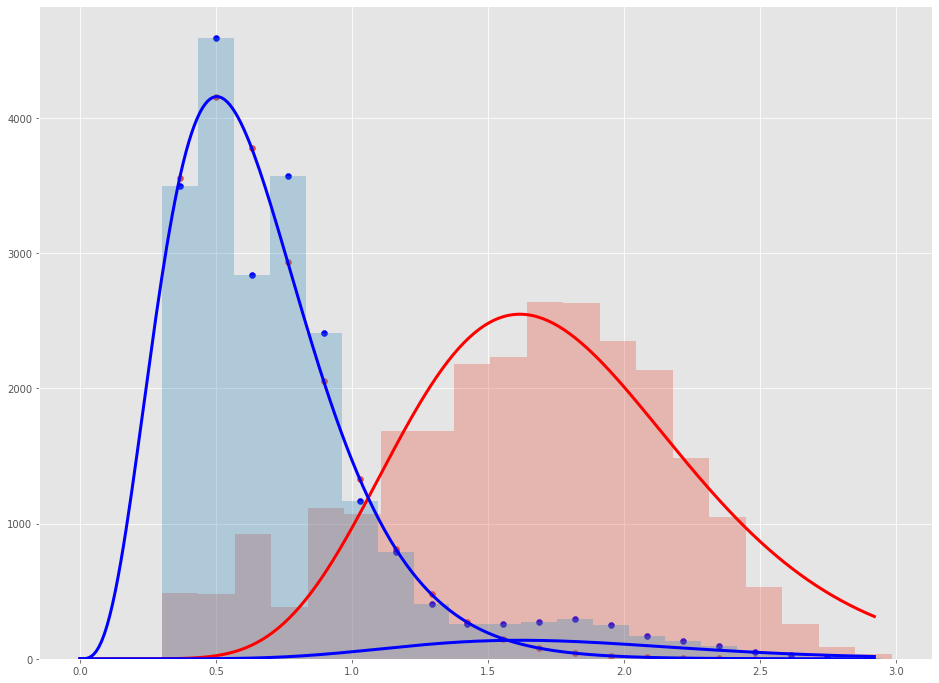

In [10]:
import sys
#psite_filename = "psite_islands/d_human_filt_K.tsv"
#disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_ac_human_S2_stats.txt"
#permut_filename = "psite_islands/d_ac_human_S2_permuts.txt"
#in_island_psites = "psite_islands/d_ac_human_isl.tsv"
#no_isl_psites = "psite_islands/d_ac_human_n_isl.tsv"

#psite_filename = "psite_islands/d_human_hmr_cons_all.tsv"
#disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_human_hmr_cons_S2_stats.txt"
#permut_filename = "psite_islands/d_human_hmr_cons_S2_permuts.txt"
#in_island_psites = "psite_islands/d_human_hmr_cons_isl.tsv"
#no_isl_psites = "psite_islands/d_human_hmr_cons_n_isl.tsv"
#
#psite_filename = "psite_islands/d_human_hmr_cons_all.tsv"
#disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_hud_human_hmr_isl_S2_stats.txt"
#permut_filename = "psite_islands/d_hud_human_hmr_n_isl_S2_stats.txt"
#in_island_psites = "psite_islands/tmp_d_human_hmr_cons_isl.tsv"
#no_isl_psites = "psite_islands/tmp_d_human_hmr_cons_n_isl.tsv"

#psite_filename = "psite_islands/d_mouse_iptm_col.tsv"
#disord_reg_filename = "psite_islands/mouse_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_mouseS2_stats.txt"
#permut_filename = "psite_islands/d_mouseS2_permuts.txt"
#in_island_psites = "psite_islands/d_mouse_iptm_col_isl.tsv"
#no_isl_psites = "psite_islands/d_mouse_iptm_col_n_isl.tsv"

#psite_filename = "psite_islands/d_human_mouse_cons_iptmnet.tsv"
#disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/hm_filt_np_S2_stats.txt"
#permut_filename = "psite_islands/hm_filt_np_S2_permuts.txt"
#in_island_psites = "psite_islands/d_human_mouse_cons_iptmnet_isl.tsv"
#no_isl_psites = "psite_islands/d_human_mouse_cons_iptmnet_n_isl.tsv"

#psite_filename = "psite_islands/d_mouse_iptmnet.tsv"
#disord_reg_filename = "psite_islands/mouse_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_mouseS2_stats.txt"
#permut_filename = "psite_islands/d_mouseS2_permuts.txt"
#in_island_psites = "psite_islands/d_mouse_iptmnet_isl.tsv"
#no_isl_psites = "psite_islands/d_mouse_iptmnet_n_isl.tsv"

#psite_filename = "psite_islands/human_nonphos_sitelist_02.tsv"
#in_island_psites = "psite_islands/human_nonphos_02_isl.tsv"
#no_isl_psites = "psite_islands/human_nonphos_02_n_isl.tsv"

#psite_filename = "psite_islands/o_human_mouse_cons_iptmnet.tsv"
#disord_reg_filename = "psite_islands/human_proteome_ordered_regs.txt"
#stat_filename = "psite_islands/hm_filt_np_or_S2_stats.txt"
#permut_filename = "psite_islands/hm_filt_np_or_S2_permuts.txt"
#in_island_psites = "psite_islands/o_human_mouse_cons_iptmnet_isl.tsv"
#no_isl_psites = "psite_islands/o_human_mouse_cons_iptmnet_n_isl.tsv"

#psite_filename = "psite_islands/d_human_iptmnet.tsv"
#disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_human_iptmnet_S2_stats.txt"
#permut_filename = "psite_islands/d_human_iptmnet_S2_permuts.txt"
#in_island_psites = "psite_islands/d_human_iptmnet_isl.tsv"
#no_isl_psites = "psite_islands/d_human_iptmnet_n_isl.tsv"
#psite_isl_file = "psite_islands/d_human_iptmnet_psite_isls.tsv"

#psite_filename = "psite_islands/d_human_iptmnet_subsamp_02.tsv"
#disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
#stat_filename = "psite_islands/d_human_iptmnet_subsamp_02_S2_stats.txt"
#permut_filename = "psite_islands/d_human_iptmnet_subsamp_02_S2_permuts.txt"
#in_island_psites = "psite_islands/d_human_iptmnet_subsamp_02_isl.tsv"
#no_isl_psites = "psite_islands/d_human_iptmnet_subsamp_02_n_isl.tsv"
#psite_isl_file = "psite_islands/d_human_iptmnet_subsamp_02_psite_isls.tsv"

psite_filename = "psite_islands/d_human_hmr_cons_isl.tsv"
disord_reg_filename = "psite_islands/human_proteome_disordered_regs.txt"
stat_filename = "psite_islands/hmr_islS2_stats.txt"
permut_filename = "psite_islands/hmr_islS2_permuts.txt"
in_island_psites = "psite_islands/tmp1.tsv"
no_isl_psites = "psite_islands/tmp2.tsv"
psite_isl_file = "psite_islands/tmp3.tsv"

gammadist_param_dict, minval, maxval = gamma_dists(permut_filename, stat_filename)
psite_dict = make_psite_dict(psite_filename)
disord_reg_dict = make_disord_reg_dict1(disord_reg_filename)
disord_reg_site_dict = make_disord_reg_site_dict(disord_reg_dict, psite_dict)
#range_a_NI = [0., 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
#range_a_IN = [0., 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
nbins = 20
#minrsq, opt_a_NI, opt_a_IN = find_min_r(range_a_NI, range_a_IN, nbins, disord_reg_site_dict, gammadist_param_dict, minval, maxval)
#print(minrsq, opt_a_NI, opt_a_IN)
A_I = float(gammadist_param_dict["real_dist"]['A'])
A_N = float(gammadist_param_dict["0dist"]['A'])
p_bI = A_I/(A_I + A_N)
p_bN = A_N/(A_I + A_N)
fit_model = Fit_model(gammadist_param_dict, 0.05, 0.05, p_bI, p_bN)
vit_dr_site_dict = run_viterbi_for_all(disord_reg_site_dict, fit_model)
distance_dist = make_distance_distribution(vit_dr_site_dict, nbins, minval, maxval)
compare_dists(fit_model, distance_dist, plot=True)

#print(vit_dr_site_dict)
count = 0
for k in vit_dr_site_dict.keys():
    for k2 in vit_dr_site_dict[k].keys():
        if vit_dr_site_dict[k][k2]:
            count += len(vit_dr_site_dict[k][k2])
#            if len(vit_dr_site_dict[k][k2]) % 2 == 1:
#                print(k, k2, vit_dr_site_dict[k][k2])
#print(count)

with open(psite_filename) as infile, open(in_island_psites, 'w') as outfile:
    for s in infile:
        filestr = s.strip().split()
        if not vit_dr_site_dict.get(filestr[0]):
            continue
        for disord_reg in vit_dr_site_dict[filestr[0]].keys():
            k = eval(filestr[2]) - 1
            if k in vit_dr_site_dict[filestr[0]][disord_reg]:
                outfile.write(s)
#                print(s.strip())

psite_dict_isl = make_psite_dict(in_island_psites)
#print(psite_dict_isl) 

with open(no_isl_psites, 'w') as no_isl, open(psite_filename) as infile:
    for s in infile:
        rec = s.strip().split()
        if not psite_dict_isl.get(rec[0]):
            no_isl.write(s)
        elif eval(rec[2]) - 1 not in psite_dict_isl[rec[0]]:
            no_isl.write(s)
    

In [258]:
def let_num(psite_filename, phospho_aas):
    letnum_dict = dict()
    with open(psite_filename) as psites:
        for s in psites:
            s = s.strip().split()
            if s[3] not in phospho_aas:
                continue
            if letnum_dict.get(s[3]):
                letnum_dict[s[3]] += 1
            else:
                letnum_dict[s[3]] = 1
    return letnum_dict

def dictsum_count(_dict):
    dictsum = 0
    for k in _dict.keys():
        dictsum += _dict[k]
    return dictsum
    

In [264]:
in_island_psites = "psite_islands/o_human_mouse_cons_iptmnet_isl.tsv"
no_isl_psites = "psite_islands/o_human_mouse_cons_iptmnet_n_isl.tsv"

numdict_isl = let_num(in_island_psites, "STY")
numdict_n_isl = let_num(no_isl_psites, "STY")
dictsum_isl = dictsum_count(numdict_isl)
dictsum_n_isl = dictsum_count(numdict_n_isl)
statfunc = st.chi2_contingency

#print(numdict_isl)
#print(numdict_n_isl)

print("Phospho_aa\tisl_freq\tn_isl_freq\tpvalue")
for k in numdict_isl.keys():
    pvalue = g, pvalue, dof, expctd = statfunc([[numdict_isl[k], dictsum_isl], [numdict_n_isl[k], dictsum_n_isl]])
    print("{}\t{}\t{}\t{}".format(k, float(numdict_isl[k])/dictsum_isl, float(numdict_n_isl[k])/dictsum_n_isl, pvalue))
    

Phospho_aa	isl_freq	n_isl_freq	pvalue
T	0.25522317188983856	0.16904600045320645	3.169455776107403e-15
S	0.3855650522317189	0.5171085429413098	5.2824588909357645e-14
Y	0.35921177587844255	0.3138454566054838	0.0018018634804509302


In [1]:
##PHOSPHOSITE CLASS REPRESENTATION
def make_psite_class_dict(psite_filename):
    psite_dict = dict()
    with open(psite_filename) as psite_file:
        for s in psite_file:
            s = s.strip().split()
            if s[0] == "UniProtID":
                continue
            if psite_dict.get(s[0]):
                psite_dict[s[0]][eval(s[2]) - 1] = s
            else:
                psite_dict[s[0]] = dict()
                psite_dict[s[0]][eval(s[2]) - 1] = s
    return psite_dict

def sitenum_calc(class_list, class_psite_dict, psite_dict):
    sitenum = 0
    for uniprot_id in psite_dict.keys():
        for crd in psite_dict[uniprot_id].keys():
            if not class_psite_dict.get(uniprot_id):
                continue
            if class_psite_dict[uniprot_id][crd][5] in class_list:
                sitenum += 1
    return sitenum

def dictsum(_dict):
    _sum = 0
    for k in _dict.keys():
        _sum += _dict[k]
    return _sum

def dict2sum(_dict):
    _sum = 0
    for k in _dict.keys():
        for k2 in _dict[k].keys():
            _sum += 1
    return _sum

def make_in_dr_dict(_dict, dr_dict):
    id_dr_dict = dict()
    for uniprot_id in _dict.keys():
        for crd in _dict[uniprot_id].keys():
            if not dr_dict.get(uniprot_id):
                continue
            if not dr_dict[uniprot_id].get(crd):
                continue
            if id_dr_dict.get(uniprot_id):
                id_dr_dict[uniprot_id][crd] = _dict[uniprot_id][crd]
            else:
                id_dr_dict[uniprot_id] = dict()
                id_dr_dict[uniprot_id][crd] = _dict[uniprot_id][crd]
    return id_dr_dict

In [2]:
print(0)
class_dict = make_psite_class_dict("psite_islands/mouse_iptm_col_classes.tsv")
o_mouse = make_psite_class_dict("psite_islands/o_mouse_iptm_col.tsv")
d_mouse = make_psite_class_dict("psite_islands/d_mouse_iptm_col.tsv")
d_mouse_isl = make_psite_class_dict("psite_islands/d_mouse_iptm_isl.tsv")
d_mouse_n_isl = make_psite_class_dict("psite_islands/d_mouse_iptm_n_isl.tsv")
tc1 = make_psite_class_dict("psite_islands/mouse_tissue_collection_1.tsv")
tc2 = make_psite_class_dict("psite_islands/mouse_tissue_collection_2.tsv")
tc3 = make_psite_class_dict("psite_islands/mouse_tissue_collection_3.tsv")
tc4 = make_psite_class_dict("psite_islands/mouse_tissue_collection_4.tsv")
tc5 = make_psite_class_dict("psite_islands/mouse_tissue_collection_5.tsv")
tc6 = make_psite_class_dict("psite_islands/mouse_tissue_collection_6.tsv")
tc7 = make_psite_class_dict("psite_islands/mouse_tissue_collection_7.tsv")
tc8 = make_psite_class_dict("psite_islands/mouse_tissue_collection_8.tsv")
tc9 = make_psite_class_dict("psite_islands/mouse_tissue_collection_9.tsv")
print(1)
tc1_dr = make_in_dr_dict(tc1, d_mouse)
tc2_dr = make_in_dr_dict(tc2, d_mouse)
tc3_dr = make_in_dr_dict(tc3, d_mouse)
tc4_dr = make_in_dr_dict(tc4, d_mouse)
tc5_dr = make_in_dr_dict(tc5, d_mouse)
tc6_dr = make_in_dr_dict(tc6, d_mouse)
tc7_dr = make_in_dr_dict(tc7, d_mouse)
tc8_dr = make_in_dr_dict(tc8, d_mouse)
tc9_dr = make_in_dr_dict(tc9, d_mouse)
print(2)
tc1_or = make_in_dr_dict(tc1, o_mouse)
tc2_or = make_in_dr_dict(tc2, o_mouse)
tc3_or = make_in_dr_dict(tc3, o_mouse)
tc4_or = make_in_dr_dict(tc4, o_mouse)
tc5_or = make_in_dr_dict(tc5, o_mouse)
tc6_or = make_in_dr_dict(tc6, o_mouse)
tc7_or = make_in_dr_dict(tc7, o_mouse)
tc8_or = make_in_dr_dict(tc8, o_mouse)
tc9_or = make_in_dr_dict(tc9, o_mouse)
print(3)
tc1_dr_isl = make_in_dr_dict(tc1, d_mouse_isl)
tc2_dr_isl = make_in_dr_dict(tc2, d_mouse_isl)
tc3_dr_isl = make_in_dr_dict(tc3, d_mouse_isl)
tc4_dr_isl = make_in_dr_dict(tc4, d_mouse_isl)
tc5_dr_isl = make_in_dr_dict(tc5, d_mouse_isl)
tc6_dr_isl = make_in_dr_dict(tc6, d_mouse_isl)
tc7_dr_isl = make_in_dr_dict(tc7, d_mouse_isl)
tc8_dr_isl = make_in_dr_dict(tc8, d_mouse_isl)
tc9_dr_isl = make_in_dr_dict(tc9, d_mouse_isl)
print(4)
tc1_dr_n_isl = make_in_dr_dict(tc1, d_mouse_n_isl)
tc2_dr_n_isl = make_in_dr_dict(tc2, d_mouse_n_isl)
tc3_dr_n_isl = make_in_dr_dict(tc3, d_mouse_n_isl)
tc4_dr_n_isl = make_in_dr_dict(tc4, d_mouse_n_isl)
tc5_dr_n_isl = make_in_dr_dict(tc5, d_mouse_n_isl)
tc6_dr_n_isl = make_in_dr_dict(tc6, d_mouse_n_isl)
tc7_dr_n_isl = make_in_dr_dict(tc7, d_mouse_n_isl)
tc8_dr_n_isl = make_in_dr_dict(tc8, d_mouse_n_isl)
tc9_dr_n_isl = make_in_dr_dict(tc9, d_mouse_n_isl)
print(5)
tc_list = [tc1, tc2, tc3, tc4, tc5, tc6, tc7, tc8, tc9]
tc_dr_list = [tc1_dr, tc2_dr, tc3_dr, tc4_dr, tc5_dr, tc6_dr, tc7_dr, tc8_dr, tc9_dr]
tc_or_list = [tc1_or, tc2_or, tc3_or, tc4_or, tc5_or, tc6_or, tc7_or, tc8_or, tc9_or]
tc_dr_isl_list = [tc1_dr_isl, tc2_dr_isl, tc3_dr_isl, tc4_dr_isl, tc5_dr_isl, tc6_dr_isl, tc7_dr_isl, tc8_dr_isl, tc9_dr_isl]
tc_dr_n_isl_list = [tc1_dr_n_isl, tc2_dr_n_isl, tc3_dr_n_isl, tc4_dr_n_isl, tc5_dr_n_isl, tc6_dr_n_isl, tc7_dr_n_isl, tc8_dr_n_isl, tc9_dr_n_isl]


0
1
2
3
4
5


In [3]:
def compare_dicts(sitedict1, sitedict2, oper_name, class_dict):
    print(oper_name)
    numdict1 = dict()
    numdict2 = dict()
    statfunc = st.chi2_contingency
    for i in "YPABO":
        numdict1[i] = sitenum_calc(i, class_dict, sitedict1)
        numdict2[i] = sitenum_calc(i, class_dict, sitedict2)

    s1 = dictsum(numdict1)
    s2 = dictsum(numdict2)
    for i in "YPABO":
        cont_arr = [[numdict1[i], s1], [numdict2[i], s2]]
        g, pvalue, dof, expctd = statfunc(cont_arr)
        r1 = round(float(numdict1[i])/s1, 6)
        r2 = round(float(numdict2[i])/s2, 6)
        print("{}\t{}\t{}\t{}".format(i, r1, r2, pvalue))

In [7]:
compare_dicts(o_mouse, d_mouse, "\nORDERED/DISORDERED | ALL", class_dict)
compare_dicts(d_mouse_isl, d_mouse_n_isl, "\nIN ISLAND/NOT IN ISLAND | ALL", class_dict)

count = 0
compare_dicts(tc_list[0], tc_list[-1], "\nIN 1/IN 9 TISSUES", class_dict)

compare_dicts(tc_dr_isl_list[0], tc_dr_isl_list[-1], "\nIN ISLAND: IN 1/IN 9 TISSUES", class_dict)

r1 = float(dict2sum(tc_dr_isl_list[0]))/dict2sum(tc_dr_list[0])
r2 = float(dict2sum(d_mouse_isl))/dict2sum(d_mouse)

for i in range(9):
    r1 = float(dict2sum(tc_dr_isl_list[i]))/dict2sum(tc_dr_list[i])
    r2 = float(dict2sum(d_mouse_isl))/dict2sum(d_mouse)
    cont_arr = [[dict2sum(tc_dr_isl_list[i]), dict2sum(tc_dr_n_isl_list[i])], [dict2sum(d_mouse_isl), dict2sum(d_mouse_n_isl)]]
    g, pvalue, dof, expctd = st.chi2_contingency(cont_arr)
    print("Overrepresentation in islands for {} tissues\n{}\t{}\t{}".format(i + 1, r1, r2, pvalue))
#for _dict in tc_list:
#    count += 1
#    compare_dicts(class_dict, _dict, "\nALL/IN {} TISSUES".format(count), class_dict)
cont_arr = [[dict2sum(tc_dr_isl_list[0]), dict2sum(tc_dr_n_isl_list[0])], [dict2sum(tc_dr_isl_list[-1]), dict2sum(tc_dr_n_isl_list[-1])]]
g, pvalue, dof, expctd = st.chi2_contingency(cont_arr)
print(pvalue)


ORDERED/DISORDERED | ALL
Y	0.272874	0.053873	0.0
P	0.077517	0.248646	0.0
A	0.149204	0.233387	1.29681255765973e-91
B	0.174899	0.215276	5.824675117604901e-23
O	0.325506	0.248818	6.835069586044171e-56

IN ISLAND/NOT IN ISLAND | ALL
Y	0.048163	0.062239	2.2280917506891063e-14
P	0.21066	0.304309	5.4188729693941066e-104
A	0.243757	0.218191	6.22524619294931e-10
B	0.204416	0.23119	1.3113602083333525e-11
O	0.293005	0.184069	2.782198849351755e-144

IN 1/IN 9 TISSUES
Y	0.034422	0.008392	0.00032624729693068544
P	0.262164	0.316084	0.020155638267281544
A	0.254163	0.373427	2.956139746026205e-07
B	0.18932	0.232168	0.025341100239917133
O	0.259931	0.06993	3.1609224317421244e-21

IN ISLAND: IN 1/IN 9 TISSUES
Y	0.030963	0.003448	0.0003156072695545585
P	0.24379	0.322414	0.0019486260980839988
A	0.272201	0.374138	0.00018751791130611954
B	0.16247	0.22931	0.0008770085344003921
O	0.290575	0.07069	2.0627072529702788e-20
Overrepresentation in islands for 1 tissues
0.6253191489361702	0.5752319148051084	2.323003638

In [9]:
for i in range(9):
    r1 = float(dict2sum(tc_dr_list[i]))/dict2sum(d_mouse)
    r2 = float(dict2sum(d_mouse))/dict2sum(d_mouse)
    cont_arr = [[dict2sum(tc_dr_list[i]), dict2sum(tc_or_list[i])], [dict2sum(d_mouse), dict2sum(o_mouse)]]
    g, pvalue, dof, expctd = st.chi2_contingency(cont_arr)
    print("Overrepresentation in islands for {} tissues\n{}\t{}\t{}".format(i + 1, r1, r2, pvalue))


Overrepresentation in islands for 1 tissues
0.13034374696673462	1.0	1.6395794243541742e-132
Overrepresentation in islands for 2 tissues
0.044857661855041114	1.0	2.8979766404692733e-80
Overrepresentation in islands for 3 tissues
0.027067127029687867	1.0	1.6740796857243873e-62
Overrepresentation in islands for 4 tissues
0.01784600024959441	1.0	5.182389772680967e-41
Overrepresentation in islands for 5 tissues
0.014434876658762844	1.0	2.721597829902614e-36
Overrepresentation in islands for 6 tissues
0.012146927908814843	1.0	3.997152185812136e-34
Overrepresentation in islands for 7 tissues
0.008957666014947931	1.0	1.3509582191588602e-22
Overrepresentation in islands for 8 tissues
0.009013131439189095	1.0	1.6187914150293239e-24
Overrepresentation in islands for 9 tissues
0.009456854833118405	1.0	7.311704091235879e-31


In [11]:
def site_num_list(dict1, dict2):
    count = 0
    for k1 in dict1.keys():
        if not dict2.get(k1):
            continue
        for k2 in dict1[k1].keys():
            if dict2[k1].get(k2):
                count += 1
    return count

In [16]:
#d_mouse
#o_mouse
#tc_dr_list
#tc_or_list
l = []
for d in range(9):
    in_dr = site_num_list(tc_dr_list[d], d_mouse)
    in_or = site_num_list(tc_or_list[d], o_mouse)
    print(in_dr, in_or)
    l.append(float(in_dr)/(in_dr + in_or))
l

9400 1349
3235 334
1952 158
1287 107
1041 78
876 56
646 50
650 45
682 33


[0.8744999534840451,
 0.9064163631269263,
 0.9251184834123223,
 0.9232424677187948,
 0.9302949061662198,
 0.9399141630901288,
 0.9281609195402298,
 0.935251798561151,
 0.9538461538461539]

In [18]:
cont_arr = [[9400, 1349],[682, 33]]
g, pvalue, dof, expctd = st.chi2_contingency(cont_arr)
pvalue

4.0960552542572966e-10